In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("diabetes.csv.csv")             #loading housing_data

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

## Splitting and Scaling

In [8]:
X=df.drop(columns="Outcome")      #declaring X and y data
y=df["Outcome"]

In [9]:
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [10]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [11]:
from sklearn.model_selection import train_test_split                                #splitting dataset
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(xtrain, ytrain)
ypred=log_model.predict(xtest)

In [13]:
from sklearn.metrics import confusion_matrix

Con_matrix = confusion_matrix(ytest, ypred)
print("Confusion Matrix : \n", Con_matrix)

Confusion Matrix : 
 [[99  8]
 [20 27]]


In [14]:
from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.77      0.57      0.66        47

    accuracy                           0.82       154
   macro avg       0.80      0.75      0.77       154
weighted avg       0.81      0.82      0.81       154



In [15]:
from sklearn.metrics import accuracy_score

print("Accuracy Score :", accuracy_score(ytest, ypred))

Accuracy Score : 0.8181818181818182


#### Accuracy of logistic regression algorithm is : -       81.81%

## KNN algo

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [17]:
ypred=model.predict(xtest)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [18]:
#accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(ytest,ypred)
acc

0.7792207792207793

In [19]:
#confusion Matrix
cm=confusion_matrix(ytest,ypred)
cm

array([[93, 14],
       [20, 27]], dtype=int64)

In [20]:
#classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       107
           1       0.66      0.57      0.61        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154



In [21]:
#model with standard scaled data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [22]:
model_sc=KNeighborsClassifier(n_neighbors=5)
model_sc.fit(xtrain,ytrain)
ypred=model_sc.predict(xtest)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [23]:
#test
acc=accuracy_score(ytest,ypred)
acc

0.8181818181818182

In [24]:
#train
acc=accuracy_score(ytrain,model_sc.predict(xtrain))
acc

0.8110749185667753

##  By using SVM algorithm

In [68]:
from sklearn.model_selection import train_test_split   #splitting dataset
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
from sklearn.svm import SVC                 #importing model SVC
model=SVC(kernel="rbf",C=1)                 #declaring model
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy of model is : 0.8051948051948052


<AxesSubplot:>

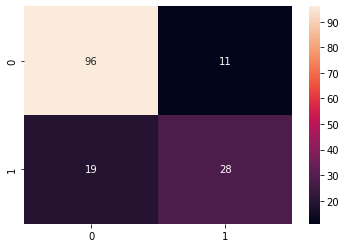

In [28]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
acc=accuracy_score(ytest,ypred)            #accuracy- evaluation of classification model
cm=confusion_matrix(ytest,ypred)            #confusion matrix
print("Accuracy of model is :",acc)
sns.heatmap(cm,annot=True)

In [29]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



In [30]:
#model Estimator
model=KNeighborsClassifier()

In [31]:
#parameter grid
#n_neighbors,metric,weights
n_neighbors=range(1,31)
metric=["euclidean","manhattan","minkowski"]
weights=['uniform','distance']
grid={"n_neighbors":n_neighbors,"metric":metric,"weights":weights}

In [32]:
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
kfold=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)

In [33]:
#Grid Search cv
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=kfold,scoring="accuracy",n_jobs=1)

In [34]:
#result
res=grid_cv.fit(xtrain,ytrain)

In [35]:
res.best_params_

{'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'distance'}

In [36]:
res.best_score_

0.7459371806832824

In [37]:
#{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
model_best=KNeighborsClassifier(metric='manhattan',n_neighbors=8,weights='distance')
model_best.fit(xtrain,ytrain)

KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')

In [38]:
ypred_best=model_best.predict(xtest)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [39]:
acc=accuracy_score(ytest,ypred_best)
acc

0.7922077922077922

## By using  Decision Tree algorithm

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
from sklearn import tree

In [42]:
clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)   #declaring decision tree model
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)

In [43]:
pred = clf.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.7597402597402597

[Text(418.5, 453.0, 'X[1] <= 0.082\ngini = 0.461\nsamples = 614\nvalue = [393, 221]'),
 Text(209.25, 271.8, 'X[7] <= -0.424\ngini = 0.301\nsamples = 352\nvalue = [287, 65]'),
 Text(104.625, 90.59999999999997, 'gini = 0.162\nsamples = 202\nvalue = [184, 18]'),
 Text(313.875, 90.59999999999997, 'gini = 0.43\nsamples = 150\nvalue = [103, 47]'),
 Text(627.75, 271.8, 'X[5] <= -0.273\ngini = 0.482\nsamples = 262\nvalue = [106, 156]'),
 Text(523.125, 90.59999999999997, 'gini = 0.438\nsamples = 74\nvalue = [50, 24]'),
 Text(732.375, 90.59999999999997, 'gini = 0.418\nsamples = 188\nvalue = [56, 132]')]

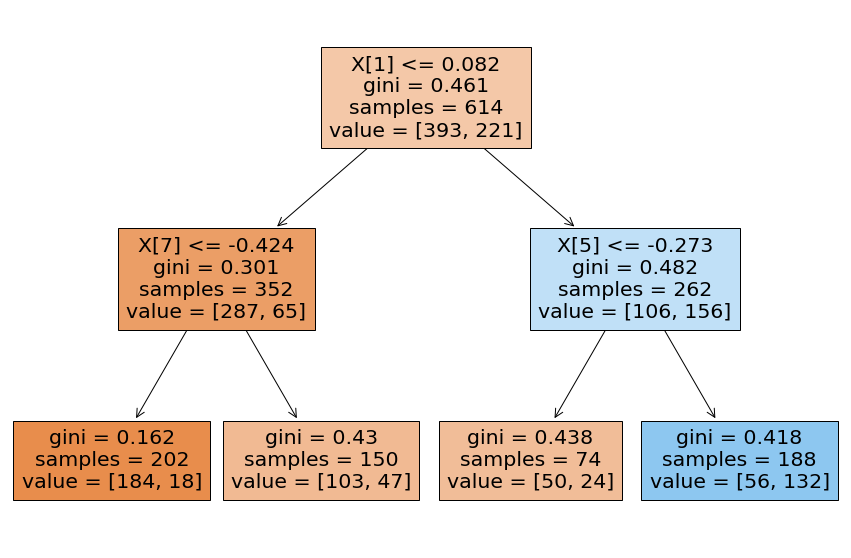

In [44]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

## Post pruning decision trees with cost complexity pruning

In [45]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

Automatically created module for IPython interactive environment


In [46]:
#X, y = load_iris(return_X_y=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=0)

In [47]:
pred=clf.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest, pred)

0.7142857142857143

In [49]:
clf = clf.fit(df.data,df.target)                #df.data- trainig, df.target- testing

## AdaBoost

In [50]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(xtrain, ytrain)
model.score(xtest,ytest)

0.7857142857142857

In [51]:
from sklearn.ensemble import AdaBoostRegressor
model_1 = AdaBoostRegressor()
model_1.fit(xtrain, ytrain)
model_1.score(xtest,ytest)

0.2040092110284174

In [52]:
ypred = model.predict(xtest)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("Accuracy is :",accuracy_score(ytest,ypred))

Accuracy is : 0.7857142857142857


In [53]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       107
           1       0.63      0.70      0.67        47

    accuracy                           0.79       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.79      0.79      0.79       154



Confusion Matrix
[[88 19]
 [14 33]]


<AxesSubplot:>

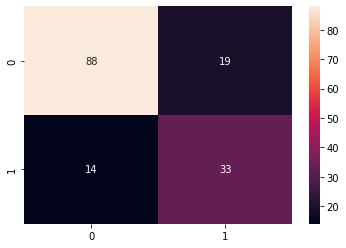

In [54]:
cm=confusion_matrix(ytest,ypred)
print("Confusion Matrix")
print(cm)
sns.heatmap(cm,annot=True)

## Gradient Boosting (GBM)

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(xtrain, ytrain)

GradientBoostingClassifier()

In [56]:
ypred=model.predict(xtest)

In [57]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy is :",accuracy_score(ytest,ypred))

Accuracy is : 0.8116883116883117


In [58]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       107
           1       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



In [59]:
cm=confusion_matrix(ytest,ypred)
cm

array([[93, 14],
       [15, 32]], dtype=int64)

<AxesSubplot:>

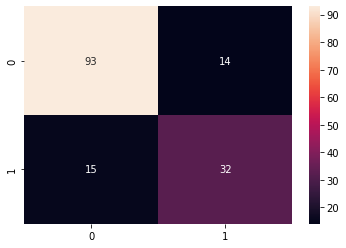

In [60]:
sns.heatmap(cm,annot=True)

## Random Forest

In [61]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

In [62]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

 ##### Bagging

accuracy is : 0.8246753246753247
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       107
           1       0.70      0.74      0.72        47

    accuracy                           0.82       154
   macro avg       0.79      0.80      0.80       154
weighted avg       0.83      0.82      0.83       154



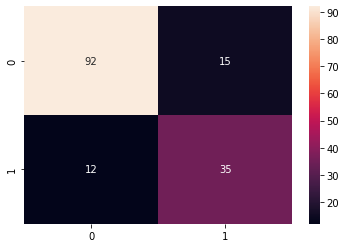

In [63]:
#Bagging Meta Estimator Classifier
from sklearn.ensemble import BaggingClassifier
#making the bagging classifier with 100 decision trees
model=BaggingClassifier(n_estimators=100)
#fitting data to bagging model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy is :",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

In [64]:
#help(BaggingClassifier)

#### Implementing The Bagging Classifier with Logistic Model

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

accuracy is : 0.8311688311688312
              precision    recall  f1-score   support

           0       0.85      0.93      0.88       107
           1       0.78      0.62      0.69        47

    accuracy                           0.83       154
   macro avg       0.81      0.77      0.79       154
weighted avg       0.83      0.83      0.82       154



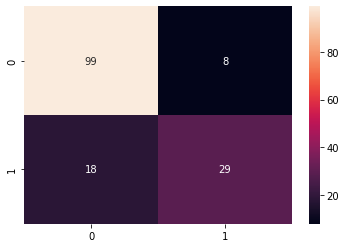

In [65]:
#Bagging Meta Estimator Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
#making the bagging classifier with 100 Logistic Regression models
model=BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100)
#fitting data to bagging model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy is :",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

#### Random Forest Classifier

accuracy is : 0.7922077922077922
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.67      0.64      0.65        47

    accuracy                           0.79       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.79      0.79      0.79       154



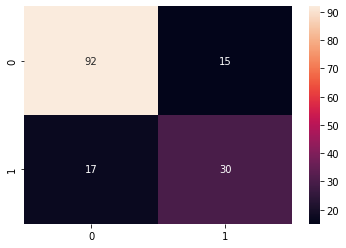

In [66]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
#fitting data to Random Forest model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy is :",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

#### Tuning HyperParameters of Random Forest

In [67]:
#model 
model=RandomForestClassifier()
n_estimators =[10,50,100,1000]
criterion =["gini", "entropy"]
max_features =["auto", "sqrt", "log2"]
#grid
grid=dict(n_estimators=n_estimators,criterion=criterion,max_features=max_features)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring='accuracy')
#results
res=grid_cv.fit(xtrain,ytrain)
print("best parameters are :",res.best_params_)
print("best accuracy is :",res.best_score_)

best parameters are : {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 1000}
best accuracy is : 0.7540805899862276
